In [8]:
import os
import sys
import matplotlib.pyplot as plt

sys.path.append('/home/kino/work/00_HEA/fukushima_hea4_3features_visualization/python_module')

g_calctype="asa"
g_polytype="bcc"

In [9]:
import os
import pickle
def load_save_pickle(filename, df, action=None):
    """load or save DataFrame to filename

    Args:
        filename (str): filename
        df (DataFrame): data
        action (list, optional): to do 'load_object', 'overwrite'. Defaults to None.

    Returns:
        str: real action 
        DataFrame: loaded data
    """
    if action is None:
        action = ["load_object"]
        
    if os.path.exists(filename):
        if "overwrite" in action and df is not None:
            with open(filename,"wb") as f:
                pickle.dump(df, f)
            return "saved", df            
        if "load_object" in action or df is None:
            with open(filename,"rb") as f:
                df = pickle.load(f)
            return "loaded", df
        return "exists", None
    else:
        if df is not None:
            with open(filename,"wb") as f:
                pickle.dump(df, f)
            return "saved", df
    return "nothing", None


In [10]:
status, g_df_calc_polytype_loaded = load_save_pickle("df_{}_{}.pickle".format(g_calctype, g_polytype),
                                                None, action=None)
print(status)
if status == "loaded":
    g_df_calc_polytype = g_df_calc_polytype_loaded


loaded


In [ ]:
g_df_calc_polytype.shape
# check whether the size is the same or not

In [11]:
g_df_calc_polytype.columns

Index(['heakey', 'element1', 'element2', 'element3', 'element4', 'polytyp',
       'ewidth', 'edelt', 'conv', 'lattice constant', 'volume', 'moment1',
       'moment2', 'moment3', 'moment4', 'total moment', 'TC(K)',
       'resistivity(micro ohm cm)', 'TE(Ry)', 'material name',
       'total magnetic moment per volume', 'group_mean', 'row_mean',
       'group_std', 'row_std', 'group1_mean', 'group2_mean', 'group3_mean',
       'group4_mean', 'group5_mean', 'group6_mean', 'group7_mean',
       'group8_mean', 'group9_mean', 'group10_mean', 'group11_mean',
       'group12_mean', 'group13_mean', 'group14_mean', 'group15_mean',
       'group16_mean', 'group17_mean', 'group18_mean', 'row1_mean',
       'row2_mean', 'row3_mean', 'row4_mean', 'row5_mean', 'row6_mean',
       'row7_mean', 'row8_mean', 'row9_mean', 's1_mean', 's2_mean', 'p1_mean',
       'p2_mean', 'p3_mean', 'p4_mean', 'p5_mean', 'p6_mean', 'd1_mean',
       'd2_mean', 'd3_mean', 'd4_mean', 'd5_mean', 'd6_mean', 'd7_mean',
    

In [12]:
g_df_calc_polytype

heakey  element1  element2  element3  element4 polytyp  ewidth  \
0      13142122        13        14        21        22     bcc   1.200   
1      13142123        13        14        21        23     bcc   1.200   
2      13142124        13        14        21        24     bcc   1.200   
3      13142125        13        14        21        25     bcc   1.200   
4      13142126        13        14        21        26     bcc   1.200   
...         ...       ...       ...       ...       ...     ...     ...   
73489  73778182        73        77        81        82     bcc   0.700   
73490  73788182        73        78        81        82     bcc   0.700   
73491  73798182        73        79        81        82     bcc   0.700   
73492  73808182        73        80        81        82     bcc   1.002   
73493  73818283        73        81        82        83     bcc   1.000   

        edelt  conv  lattice constant  ...  f5_mean f6_mean f7_mean f8_mean  \
0      0.0001  True           6.44451  ...      0.0     0.0     0.0     0.0   
1      0.0001  True           6.34053  ...      0.0     0.0     0.0     0.0   
2      0.0001  True           6.28741  ...      0.0     0.0     0.0     0.0   
3      0.0001  True           6.29336  ...      0.0     0.0     0.0     0.0   
4      0.0001  True           6.28093  ...      0.0     0.0     0.0     0.0   
...       ...   ...               ...  ...      ...     ...     ...     ...   
73489  0.0001  True           6.74686  ...      0.0     0.0     0.0     0.0   
73490  0.0001  True           6.77017  ...      0.0     0.0     0.0     0.0   
73491  0.0001  True           6.81574  ...      0.0     0.0     0.0     0.0   
73492  0.0001  True           6.96791  ...      0.0     0.0     0.0     0.0   
73493  0.0001  True           7.23596  ...      0.0     0.0     0.0     0.0   

      f9_mean f10_mean f11_mean f12_mean f13_mean f14_mean  
0         0.0      0.0      0.0      0.0      0.0      0.0  
1         0.0      0.0      0.0      0.0      0.0      0.0  
2         0.0      0.0      0.0      0.0      0.0      0.0  
3         0.0      0.0      0.0      0.0      0.0      0.0  
4         0.0      0.0      0.0      0.0      0.0      0.0  
...       ...      ...      ...      ...      ...      ...  
73489     0.0      0.0      0.0      0.0      0.0      1.0  
73490     0.0      0.0      0.0      0.0      0.0      1.0  
73491     0.0      0.0      0.0      0.0      0.0      1.0  
73492     0.0      0.0      0.0      0.0      0.0      1.0  
73493     0.0      0.0      0.0      0.0      0.0      1.0  

[73494 rows x 84 columns]

# make an abbreviation for regression

In [13]:
g_df_feature_target = g_df_calc_polytype

# define descriptor features by hand

In [ ]:
def make_features():
    """make a list of feature strings

    Returns:
        list: features
    """ 
    features = ['group_mean', 'group_std', 'row_mean', 'group_std']

    if False:
        features = ['group_mean', 'row_mean', 'group_std', 'row_std']
        features = ['group1_mean', 'group2_mean',
               'group3_mean', 'group4_mean', 'group5_mean', 'group6_mean',
               'group7_mean', 'group8_mean', 'group9_mean', 'group10_mean',
               'group11_mean', 'group12_mean', 'group13_mean', 'group14_mean',
               'group15_mean', 'group16_mean', 'group17_mean', 'group18_mean',
               'row1_mean', 'row2_mean', 'row3_mean', 'row4_mean', 'row5_mean',
               'row6_mean', 'row7_mean', 'row8_mean', 'row9_mean', 'group_mean',
               'row_mean', 'group_std', 'row_std']
    if False:
        features =  ['s1_mean', 's2_mean', 'p1_mean',
               'p2_mean', 'p3_mean', 'p4_mean', 'p5_mean', 'p6_mean', 'd1_mean',
               'd2_mean', 'd3_mean', 'd4_mean', 'd5_mean', 'd6_mean', 'd7_mean',
               'd8_mean', 'd9_mean', 'd10_mean', 'f1_mean', 'f2_mean', 'f3_mean',
               'f4_mean', 'f5_mean', 'f6_mean', 'f7_mean', 'f8_mean', 'f9_mean',
               'f10_mean', 'f11_mean', 'f12_mean', 'f13_mean', 'f14_mean']
    print()
    print(features)
    print(len(features))
    print("_".join(features))
    return features

g_features = make_features()

In [25]:
g_target_list = ['total magnetic moment per volume',
            'TC(K)', 'resistivity(micro ohm cm)']

In [26]:
import random
random.seed(1)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import time
import numpy as np

In [38]:
def make_descriptor(df_features, terms=["X1"]):
    """make original and squared features

    Args:
        df_features (DataFrame): data
        terms (list, optional): ["X1"] or ["X1","X2"]. Defaults to ["X1"].

    Returns:
        np.array: descriptor vector, X
    """    
    if "X1" in terms:
        X1 = df_features.values
        X = X1
    if "X1" in terms and "X2" in terms:
        X1 = df_features.values
        X2 = X1**2
        X = np.hstack([X,X2])
    print(X.shape)
    return X

In [39]:
def reg_Xy_all(reg,X,y):
    reg.fit(X, y)
    print("fitting done")
    yt = reg.predict(X)
    r2 = r2_score(y,yt)
    print("R2",r2)
    return r2, y, yt

def reg_Xy_train_test(reg,X,y):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)
    reg.fit(Xtrain, ytrain)
    print("fitting done")
    ytest_p = reg.predict(Xtest)
    r2 = r2_score(ytest, ytest_p)
    print("R2",r2)
    return r2, ytest, ytest_p

def reg_Xy_kfold(reg, X, y, n_splits=10, debug=True):
    r2_list = []
    ytest_all = []
    ytest_p_all = []
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    for i, (train, test) in enumerate(kf.split(X)):
        reg = LinearRegression(fit_intercept=True)
        Xtrain, ytrain = X[train], y[train]
        reg.fit(Xtrain,ytrain)
        Xtest, ytest = X[test], y[test]        
        ytest_p = reg.predict(Xtest)
        r2 = r2_score(ytest,ytest_p)
        if debug:
            print(i,"R2", r2)
        r2_list.append(r2)    
        ytest_all.append(ytest)
        ytest_p_all.append(ytest_p)
        
    return r2_list, ytest_all, ytest_p_all

In [40]:
import seaborn as sns
def plot_y_yp(ytest, ytest_p, title=None, dir_name="images", show_kde=False):
    """plot y vs y_predict gplot

    Args:
        ytest (np.array): experimental target variable quantities
        ytest_p (np.array): predicted target variable quantities
        title (str, optional): title of the figure. Defaults to None.
        dir_name (str, optional): directory name to save the figure. Defaults to "images".
        show_kde (bool, optional): a flag to show kde plot, Defaults to False.
    """
    def find_min_max(ytest, ytestp):
        """make minimum and maximum of ytest and ytestp

        Args:
            ytest (np.array): a vector
            ytestp (np.array): another vector

        Returns:
            float: the minium value
            float: the maximum value
        """
        yval = np.hstack([ytest,ytestp])
        minval = np.min(yval)
        maxval = np.max(yval)
        return minval, maxval

    print("number of data",ytest.shape)
    fig, ax = plt.subplots(1,1, figsize=(6,6))
    if title is not None:
        ax.set_title(title)
    minval, maxval = find_min_max(ytest,ytest_p)
    ax.plot([minval, maxval],[minval, maxval], '--', color="black")
    ax.set_xlabel("$y_{expr}$")
    ax.set_ylabel("$y_{pred}$")
    ax.scatter(ytest,ytest_p, alpha=0.3, s=1)

    fig.tight_layout()
    ax.set_aspect('equal')

    filename = os.path.join(dir_name, title+".png")
    filename = filename.replace(" ","_")    
    fig.savefig(filename)
    fig.show()

    print("image saved: ", filename)
    
    if show_kde:
        plt.figure(figsize=(5,5))
        if title is not None:
            plt.title(title)
        minval, maxval = find_min_max(ytest,ytest_p)
        plt.plot([minval, maxval],[minval, maxval], '--', color="black")
        plt.xlabel("$y_{expr}$")
        plt.ylabel("$y_{pred}$")
        plt.scatter(ytest,ytest_p, alpha=0.1, s=1)    
        sns.kdeplot(ytest,ytest_p)
        plt.show()    
    

In [41]:
def do_linear_regression(df_feature_target, features, target_name):
    """fit and predict data by linear regression

    Args:
        df_feature_target (DataFrame): data
        features (list): a list of feature names
        target_name (str): a name of the target varible

    Returns:
        dict: {title, R2 value}
    """    
    y = df_feature_target[target_name].astype(float).values

    result_dic = {}

    Xraw = make_descriptor(df_feature_target[features])
    scalerX = StandardScaler()
    X = scalerX.fit_transform(Xraw)
    lreg = LinearRegression(fit_intercept=True)
    r2, ytest, ytest_p = reg_Xy_train_test(lreg, X, y)

    title = "linear regression, X1, train test split"
    result_dic = {title: r2}

    plot_y_yp(ytest, ytest_p, title=",".join([title,target_name]))
    
    return result_dic

In [42]:
def do_linear_regresson_X2(df_feature_target, features, target_name):
    """fit and predict data by linear regression including squared terms of descriptors

    Args:
        df_feature_target (DataFrame): data
        features (list): a list of feature names
        target_name (str): a name of the target varible

    Returns:
        dict: {title, R2 value}
    """       
    y = df_feature_target[target_name].astype(float).values
    
    Xraw = make_descriptor(df_feature_target[features],["X1","X2"])
    scalerX = StandardScaler()
    X = scalerX.fit_transform(Xraw)
    lreg = LinearRegression(fit_intercept=True)
    r2, ytest, ytest_p = reg_Xy_train_test(lreg, X, y)

    title = "linear regression, X1 X2, train test split"
    result_dic = {title: r2}

    plot_y_yp(ytest, ytest_p, title=",".join([title,target_name]))

    return result_dic

In [43]:
def do_randomforest_regression(df_feature_target, features, target_name, n_jobs=4):
    """fit and predict data by random forest regression

    Args:
        df_feature_target (DataFrame): data
        features (list): a list of feature names
        target_name (str): a name of the target varible

    Returns:
        dict: {title, R2 value}
    """       
    y = df_feature_target[target_name].astype(float).values

    Xraw = make_descriptor(df_feature_target[features],["X1"])
    scalerX = StandardScaler()
    X = scalerX.fit_transform(Xraw)
    
    rfreg = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=n_jobs)
    r2, ytest, ytest_p = reg_Xy_train_test(rfreg, X, y)
    print("oob score", rfreg.oob_score_)
    title = "random forest regression, X1, train test split"
    result_dic = {title: r2}
    
    plot_y_yp(ytest, ytest_p, title=",".join([title,target_name]))
    
    return result_dic

In [44]:
def do_kneighbors_regression(df_feature_target, features, target_name, n_jobs=4):
    """fit and predict data by k-neighbor regression

    Args:
        df_feature_target (DataFrame): data
        features (list): a list of feature names
        target_name (str): a name of the target varible

    Returns:
        dict: {title, R2 value}
    """   
    y = df_feature_target[target_name].astype(float).values

    Xraw = make_descriptor(df_feature_target[features],["X1"])
    scalerX = StandardScaler()
    X = scalerX.fit_transform(Xraw)
    
    knreg = KNeighborsRegressor(n_neighbors=100, n_jobs=n_jobs)
    r2, ytest, ytest_p = reg_Xy_train_test(knreg, X, y)
    title = "k neighbors regression, X1, train test split"
    result_dic = {title: r2}

    plot_y_yp(ytest, ytest_p, title=",".join([title,target_name]))
    
    return result_dic


total magnetic moment per volume
(73494, 4)
fitting done
R2 0.06007910762762092
number of data (14699,)


<ipython-input-40-07e68ce28ed0>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-40-07e68ce28ed0>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


image saved:  images/linear_regression,_X1,_train_test_split,total_magnetic_moment_per_volume.png
(73494, 8)
fitting done
R2 0.11662533377835138
number of data (14699,)
image saved:  images/linear_regression,_X1_X2,_train_test_split,total_magnetic_moment_per_volume.png
(73494, 4)
fitting done
R2 0.15136388737247664
oob score 0.1469135315921879
number of data (14699,)
image saved:  images/random_forest_regression,_X1,_train_test_split,total_magnetic_moment_per_volume.png
(73494, 4)


<ipython-input-40-07e68ce28ed0>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


fitting done
R2 0.19155269900554117
number of data (14699,)
image saved:  images/k_neighbors_regression,_X1,_train_test_split,total_magnetic_moment_per_volume.png
TC(K)
(73494, 4)
fitting done
R2 0.09378860385531407
number of data (14699,)


<ipython-input-40-07e68ce28ed0>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-40-07e68ce28ed0>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


image saved:  images/linear_regression,_X1,_train_test_split,TC(K).png
(73494, 8)
fitting done
R2 0.13244240316737255
number of data (14699,)


<ipython-input-40-07e68ce28ed0>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


image saved:  images/linear_regression,_X1_X2,_train_test_split,TC(K).png
(73494, 4)
fitting done
R2 0.19983051163025023
oob score 0.16844406474006568
number of data (14699,)


<ipython-input-40-07e68ce28ed0>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


image saved:  images/random_forest_regression,_X1,_train_test_split,TC(K).png
(73494, 4)
fitting done
R2 0.20036091791093902
number of data (14699,)
image saved:  images/k_neighbors_regression,_X1,_train_test_split,TC(K).png
resistivity(micro ohm cm)
(73494, 4)
fitting done
R2 0.5020014638754297
number of data (14699,)


<ipython-input-40-07e68ce28ed0>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-40-07e68ce28ed0>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


image saved:  images/linear_regression,_X1,_train_test_split,resistivity(micro_ohm_cm).png
(73494, 8)
fitting done
R2 0.6273132355265276
number of data (14699,)


<ipython-input-40-07e68ce28ed0>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


image saved:  images/linear_regression,_X1_X2,_train_test_split,resistivity(micro_ohm_cm).png
(73494, 4)
fitting done
R2 0.7702624467047748
oob score 0.7680338005099161
number of data (14699,)


<ipython-input-40-07e68ce28ed0>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


image saved:  images/random_forest_regression,_X1,_train_test_split,resistivity(micro_ohm_cm).png
(73494, 4)
fitting done
R2 0.7626958357897445
number of data (14699,)
image saved:  images/k_neighbors_regression,_X1,_train_test_split,resistivity(micro_ohm_cm).png


<ipython-input-40-07e68ce28ed0>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


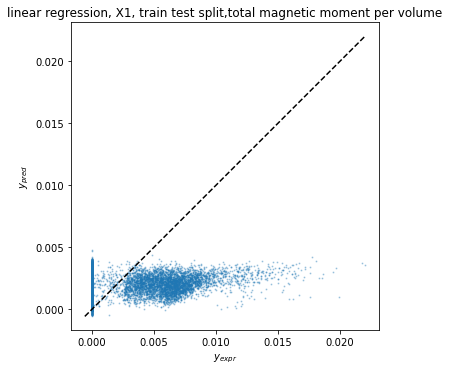

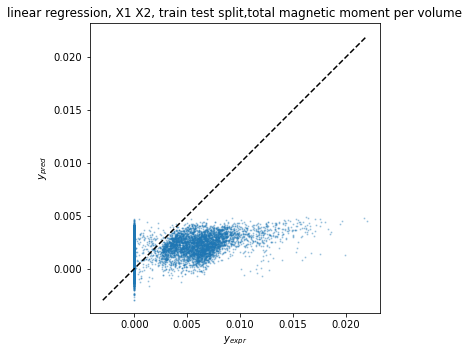

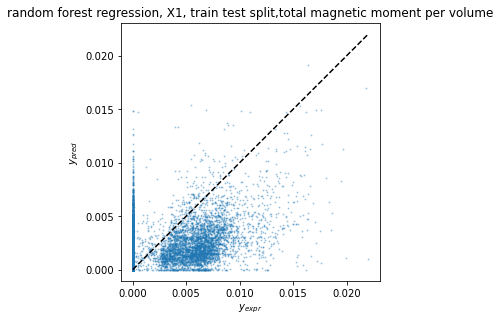

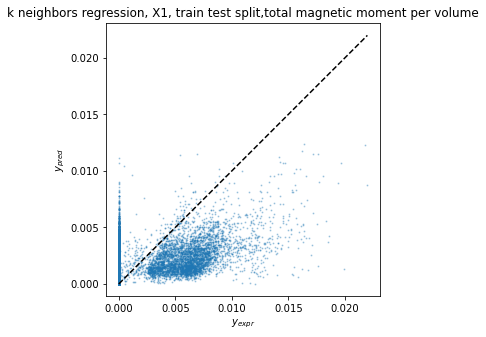

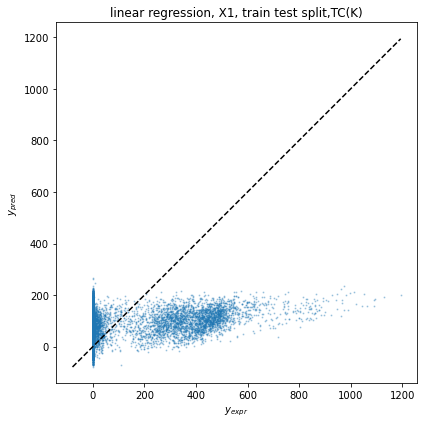

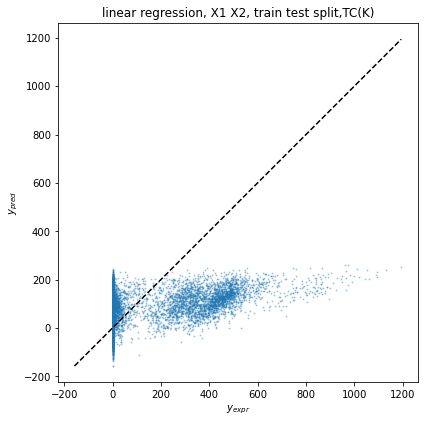

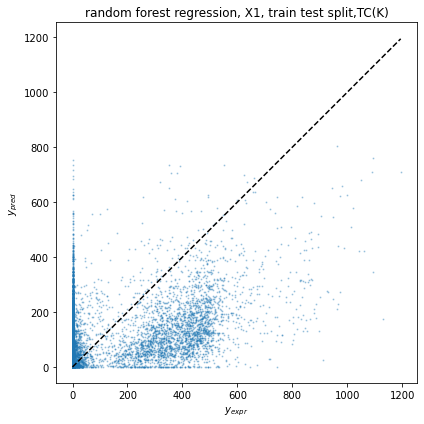

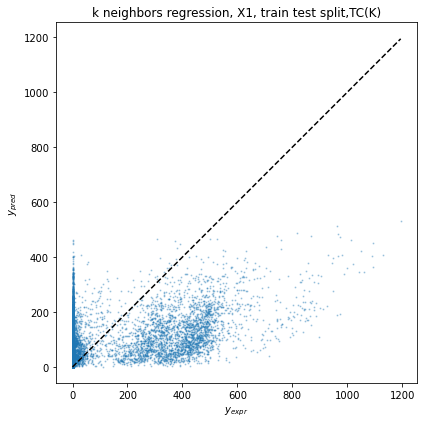

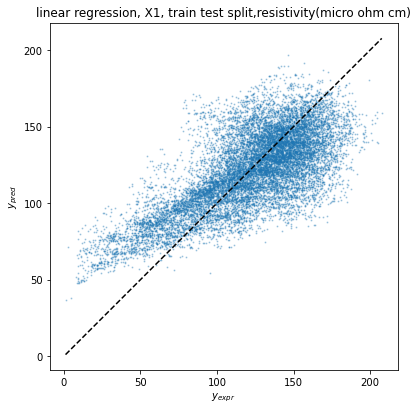

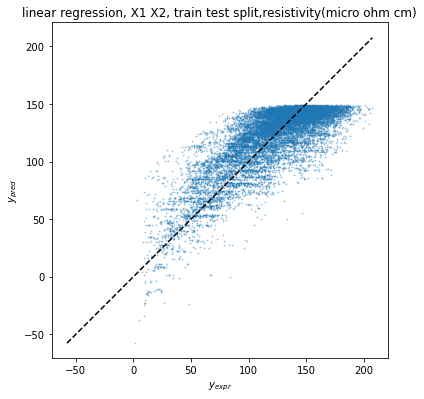

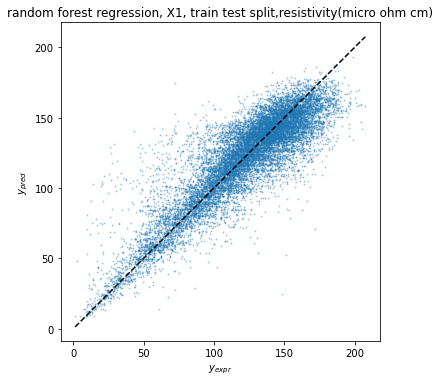

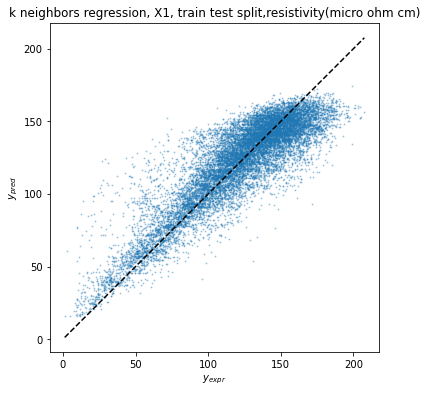

In [46]:
%matplotlib inline

def all_regression(df_feature_target, features, target_list):
    """execute all the regression and make resulting dict

    Args:
        df_feature_target (DataFrame): data
        features (list): a list of feature names
        target_list (str): a name of target variable

    Returns:
        dict: R2 results for all the regressions.
    """    
    result_dic_all = {}
    for target_name in  target_list:
        result_dic_all[target_name] = {}

    for target_name in  target_list:
        print(target_name)
        result = do_linear_regression(df_feature_target, features, target_name)
        result_dic_all[target_name].update(result)
        result = do_linear_regresson_X2(df_feature_target, features, target_name)
        result_dic_all[target_name].update(result)
        result = do_randomforest_regression(df_feature_target, features, target_name)
        result_dic_all[target_name].update(result)
        result = do_kneighbors_regression(df_feature_target, features, target_name)
        result_dic_all[target_name].update(result)
    return result_dic_all

g_result_dic_all = all_regression(g_df_feature_target, g_features, g_target_list)

## loop done

## plot result


In [49]:
from collections import OrderedDict
import pandas as pd
def make_df_r2(result_dic_all, target_list):
    """make a DataFrame of resulting R2

    Args:
        result_dic_all (dict): resulting R2
        target_list (list): a list of target variables for reordering

    Returns:
        [type]: [description]
    """    
    result_dic_all_ordered = OrderedDict()
    for target_name in g_target_list[:3]:
        print(target_name)
        result_dic_all_ordered[target_name] = result_dic_all[target_name]

    df_r2 = pd.DataFrame(result_dic_all_ordered).T
    return df_r2
g_df_r2 = make_df_r2(g_result_dic_all, g_target_list)

total magnetic moment per volume
TC(K)
resistivity(micro ohm cm)


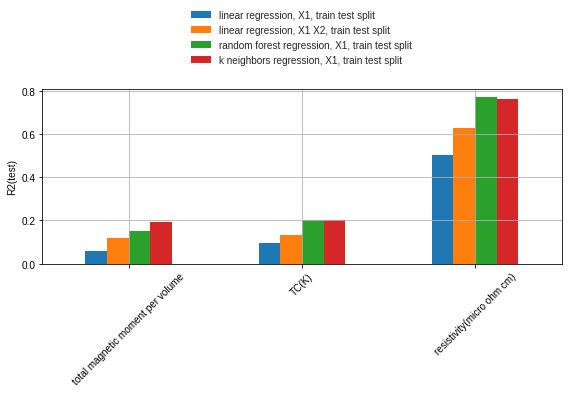

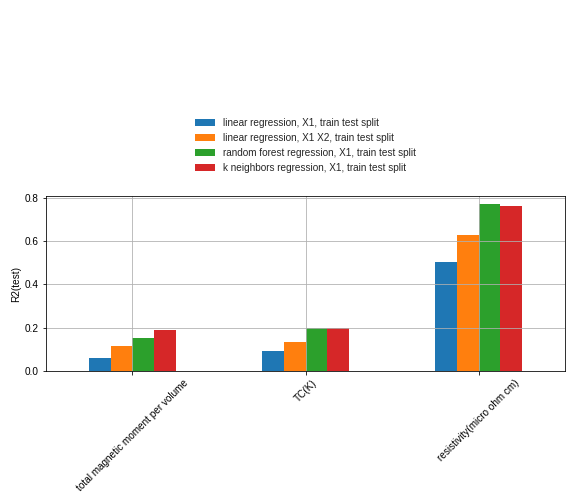

In [50]:
import matplotlib.pyplot as plt
from IPython.display import Image, display_png

def plot_r2(df_r2):
    """plot R2 results

    Args:
        df_r2 (DataFrame): containingg R2
    """    
    fig, ax = plt.subplots(1,1, figsize=(8,7))
    # plt.style.use('seaborn-colorblind')
    plt.style.use('seaborn-whitegrid')
    # plt.style.use('seaborn-darkgrid')

    df_r2.plot.bar(ax=ax)

    ax.legend(loc='upper center' , bbox_to_anchor=(0.5, 1.5))
    ax.set_ylabel("R2(test)")
    #plt.rcParams["figure.figsize"] = [8, 4]
    ax.tick_params(axis='x', labelrotation=45)
    fig.tight_layout()

    pngfile = "target_r2.png"
    plt.savefig(pngfile)
    plt.show()

    # tight_layoutの確認のためにreload
    display_png(Image(pngfile))
    
plot_r2(g_df_r2)